# HIV Model

Arwen Sadler

In [7]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from SymPy.
from modsim import *

In [14]:
def run_simulation(system, state, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    
    frame = TimeFrame(columns=state.index)
    frame.row[system.t_0] = state
    
    for t in linrange(system.t_0, system.t_end, system.dt):
        frame.row[t+system.dt] = update_func(system, frame.row[t])
    
    return frame

In [15]:
def plot_results(R, L, E, V):
    '''Plots the results
    wolves and elk are each a column of the dataframe
    '''
    plot(R, label='R')
    plot(L, label='L')
    plot(E, label='E')
    #plot(V, label='V')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [16]:
#Set up the state variable
state = State(R=200,
             L=0,
             E=0,
             V=0.0000004)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [20]:
#Set up the system object
system = System(gamma = 1.36,
                mu = 0.00136,
                tau = 0.2,
                beta = 0.00027,
                rho = 0.1,
                alpha = 0.036,
                sigma = 2,
                delta = 0.33,
                pi = 100,
                t_0 = 1,
                t_end = 120,
                dt = 1/24)

,values
gamma,1.360000
mu,0.001360
tau,0.200000
beta,0.000270
rho,0.100000
alpha,0.036000
sigma,2.000000
delta,0.330000
pi,100.000000
t_0,1.000000


In [21]:
def update_func(system, state):
    '''Update the HIV model
    
    state : State(r, l, e, v)
    t: time
    system: System object
    
    returns: State(RLEV)'''
    
    unpack(system)
    
    dRdt = gamma*tau - mu*state.R - beta*state.R*state.V
    dLdt = rho*beta*state.R*state.V - mu*state.L - alpha*state.L
    dEdt = (1-rho)*beta*state.R*state.V + alpha*state.L - delta*state.E
    dVdt = pi*state.E - sigma*state.V
    
    state.R += dRdt * dt
    state.L += dLdt * dt
    state.E += dEdt * dt
    state.V += dVdt * dt
    
    return state

In [24]:


data = run_simulation(system, state, update_func)


,R,L,E,V
1.000000,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
1.041667,200.000000,9.000000e-11,8.100000e-10,3.666667e-07
1.083333,200.000000,1.723599e-10,1.541497e-09,3.394861e-07
1.125000,200.000000,2.484760e-10,2.208020e-09,3.176185e-07
1.166667,200.000000,3.195533e-10,2.821210e-09,3.003504e-07
1.208333,200.000000,3.866347e-10,3.391107e-09,2.870762e-07
1.250000,200.000000,4.506250e-10,3.926389e-09,2.772828e-07
1.291667,200.000000,5.123122e-10,4.434574e-09,2.705359e-07
1.333333,200.000000,5.723853e-10,4.922203e-09,2.664686e-07
1.375000,200.000000,6.314497e-10,5.394980e-09,2.647721e-07


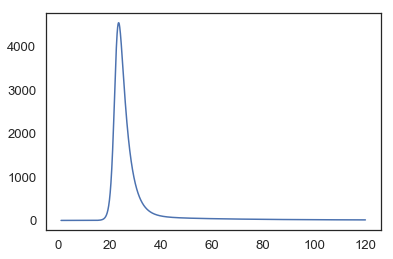

In [25]:
data.V.plot()

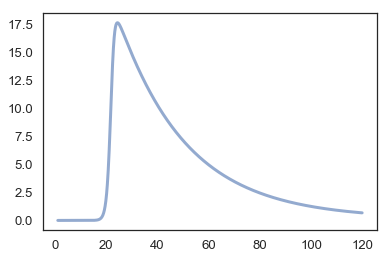

In [29]:
plot(data.L)
#plot(data.R)
#plot(data.E)